In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
from ETL.EtlCovid import *
from ETL.EtlElection import *
from ETL.EtlVaccine import *
from ETL.EtlUrbanRural import *
from Visualization.VizBase import *
from Visualization.VizCovid import *
from Visualization.VizVaccine import *
from Visualization.VizMask import *
from Visualization.VizUrbanRural import *

In [7]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [5]:
urban_rural_election_df = MergeElectionUrbanRural()
urban_rural_rolling_avg_full_df, urban_rolling_avg_full_df, rural_rolling_avg_full_df = CountyElecUrbanRuralSplit(
        getUrbanRuralElectionRollingData)
urban_rural_avgdeaths_full_df, urban_avgdeaths_full_df, rural_avgdeaths_full_df = CountyElecUrbanRuralSplit(
        getUrbanRuralAvgDeathsData)

# Does the Urban/Rural Demographic Influence the COVID Effects?

Among the socioeconomic factors frequently and strongly associated with political affiliation is the urban/rural demographic of the voting population. Could this factor influence the pattern we have seen above, of the COVID-19 effects being split along party lines?

The Census Bureau defines urban areas by population size, specifically 2,500 or greater. Also from the Census Bureau, we obtained a list of US counties with a ‘percent rural’ designation, meaning the percentage of county population living in rural areas.

## Political affiliation
Merging that with the presidential election county results, we see there seems to be a clear divide in political affiliation between rural areas and urban centers. Counties less than about 32% rural were more likely to vote democrat, while those above were more likely to vote republican.

The merge was done on the county FIPS code, and about 40 counties were lost in the merge due to mismatches. Out of more than 3000 counties, this was considered an acceptable loss.

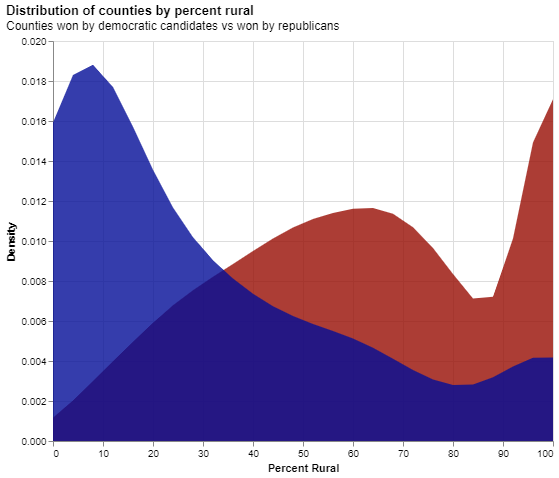

In [8]:
ElectionUrbanRuralDensityPlot(urban_rural_election_df)

Since we want to see the effect of political affiliation on the COVID response, the next question is: How strongly democrat or republican were those counties? For that, we used the ratio of winning party votes to total votes, which we call the ‘vote fraction’. Plotting against the Percent Rural designation of each county, we find no correlation (-0.07) for counties won by the democratic candidate, and a weak positive correlation (0.25) for counties won by the republican candidate.

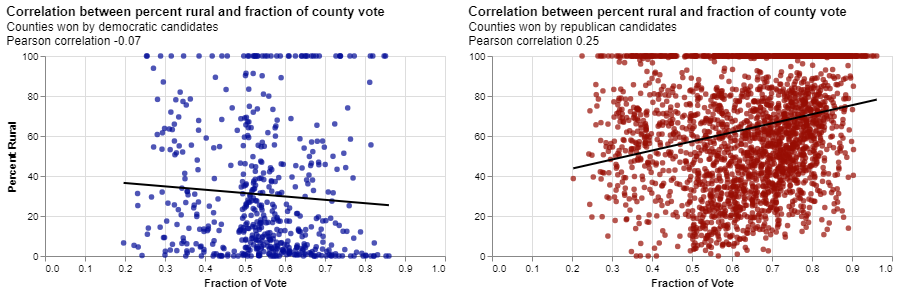

In [9]:
UrbanRuralCorrelation(urban_rural_election_df)

This is a positive initial result, since it implies that the urban/rural nature of a county has little to no effect on the strength of the affiliation.

## COVID effects

Finally, we come to the main question, which is whether the urban/rural nature has an influence on the effects of the COVID pandemic, indicated by the rolling case average and the deaths.

The Census Bureau classifies counties with 50% or more of their population living in rural areas as ‘mostly rural’, while the remainder are classified as ‘mostly urban’. We split the counties by that designation, and for each, we repeat the analyses performed above.


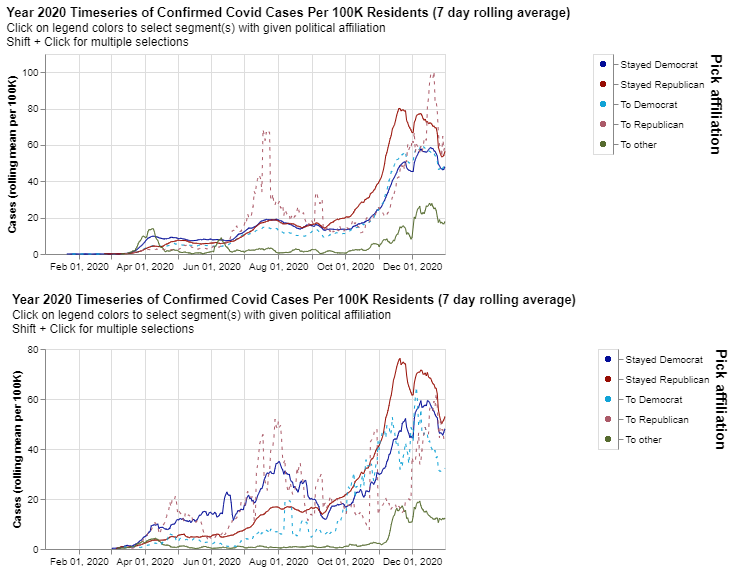

In [10]:
UrbanRuralRollingAvgCompChart(
        urban_rural_rolling_avg_full_df,
        urban_rolling_avg_full_df,
        rural_rolling_avg_full_df,
    )

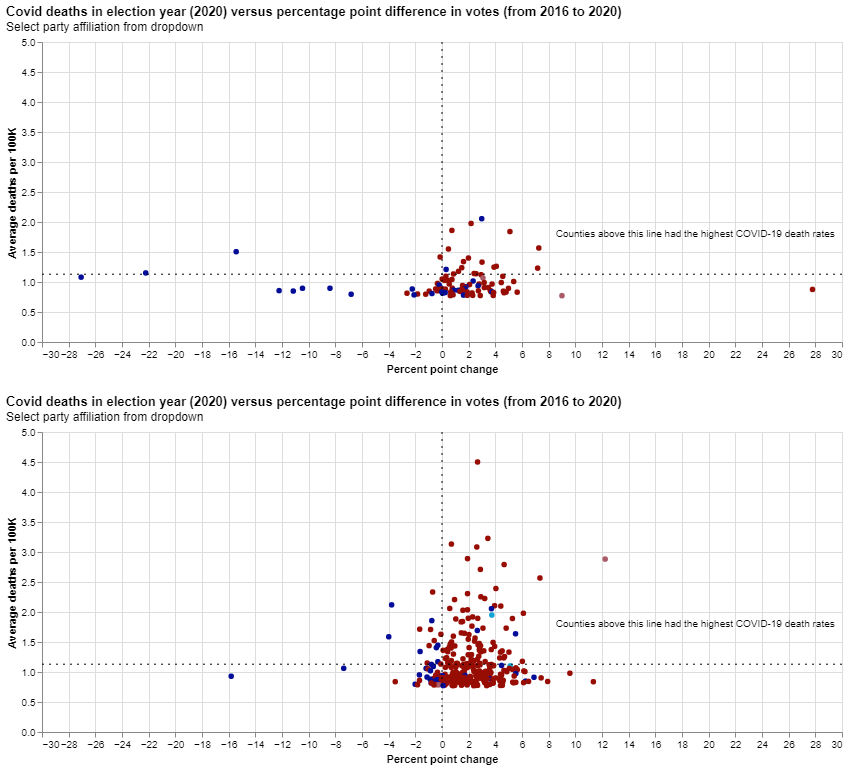

In [11]:
UrbanRuralAvgDeathsCompChart(
        urban_rural_avgdeaths_full_df, urban_avgdeaths_full_df, rural_avgdeaths_full_df
    )

For COVID rolling case average, we find that the same trends hold as those found earlier for all counties: Initially, the case numbers are higher for counties that voted democrat, but in September 2020, the rise in case numbers for counties that voted republican is steeper.

As for COVID deaths, once again, we find the same trends hold for both urban and rural counties as those found earlier for the complete set of counties: The number of deaths per 100K population is higher for more counties that are strongly republican.

So in conclusion, we can say that the urban or rural nature of a county does not have an influence on the effects of the COVID pandemic as represented by the rolling case average and the death rate.
